In [1]:
from pretty_plot import *

In [2]:
# Process baseline log
main_results = 'minisy.log'
names, results_cex = process_log(main_results)
cex = [results_cex[name][0] for name in names]
max_runtime = max(cex)

# A. No counterexamples/streaming (runtimes)

In [3]:
# Process comparison log
_, results_streaming = process_log('streaming.log', timeout=900, old_format=True)
streaming = [results_streaming[name][0] for name in names]
M = max(max_runtime, max(streaming))

<Figure size 432x288 with 0 Axes>

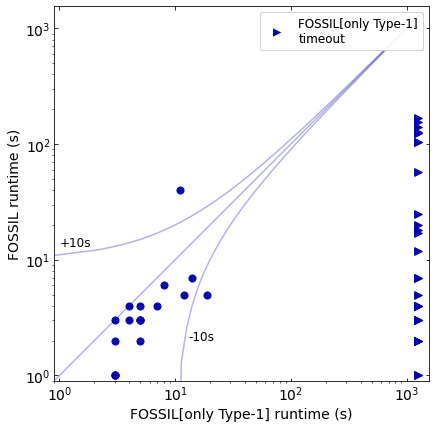

Of the 36 tests which took more than 10 seconds to run with no counterexamples,
35 were faster with main.
Of the 50 tests which ran with no counterexamples,
47 were faster with main.


In [4]:
# Plot
x = adjust(streaming, mx=M)
y = adjust(cex, mx=M)
pretty_plot(x, y, x_name='FOSSIL[only Type-1]', x_leg='upper right', color='xkcd:royal blue', offset_band_label=True)
check_benchmark(x, y, first_name='no counterexamples', second_name='main')
check_benchmark(x, y, first_name='no counterexamples', second_name='main', bench=-1)

# B. No LFP counterexamples (runtimes)

In [5]:
# Process comparison log
_, results_nocex = process_log('no_type2.log')
nocex = [results_nocex[name][0] for name in names]
M = max(max_runtime, max(nocex))

<Figure size 432x288 with 0 Axes>

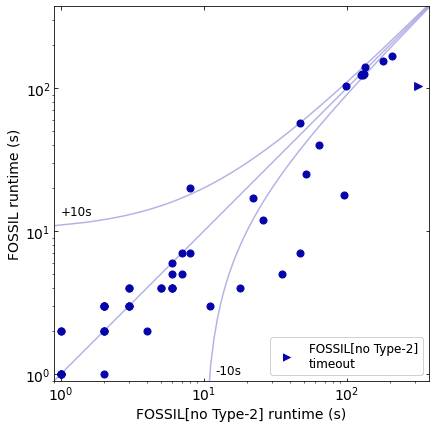

Of the 19 tests which took more than 10 seconds to run with true countermodels turned off,
16 were faster with true countermodels turned on.
Of the 50 tests which ran with true countermodels turned off,
26 were faster with true countermodels turned on.


In [6]:
# Plot
x = adjust(nocex, mx=M)
y = adjust(cex, mx=M)
pretty_plot(x, y, x_name='FOSSIL[no Type-2]', color='xkcd:royal blue', tm_val=M)
check_benchmark(x, y)
check_benchmark(x, y, bench=0)

# C. CVC4Sy (runtimes)

In [7]:
# Process comparison log
_, results_cvc4sy = process_log('cvc4sy.log')
cvc4sy = [results_cvc4sy[name][0] for name in names]
M = 500 #max(max_runtime, max(cvc4sy))

<Figure size 432x288 with 0 Axes>

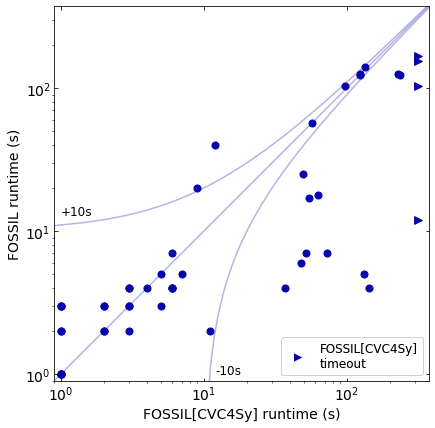

Of the 22 tests which took more than 10 seconds to run with CVC4Sy,
16 were faster with minisy.
Of the 50 tests which ran with CVC4Sy,
22 were faster with minisy.


In [8]:
# Plot
x = adjust(cvc4sy, mx=M)
y = adjust(cex, mx=M)
pretty_plot(x, y, x_name='FOSSIL[CVC4Sy]', color='xkcd:royal blue')
check_benchmark(x, y, first_name='CVC4Sy', second_name='minisy')
check_benchmark(x, y, first_name='CVC4Sy', second_name='minisy', bench=0)

# D. No LFP counterexamples (lemma proposals)

In [9]:
# Process lemma proposal counts
cex_prop = [results_cex[name][1] for name in names]
nocex_prop = [results_nocex[name][1] for name in names]
M = max([max(nocex_prop), max(cex_prop)])

<Figure size 432x288 with 0 Axes>

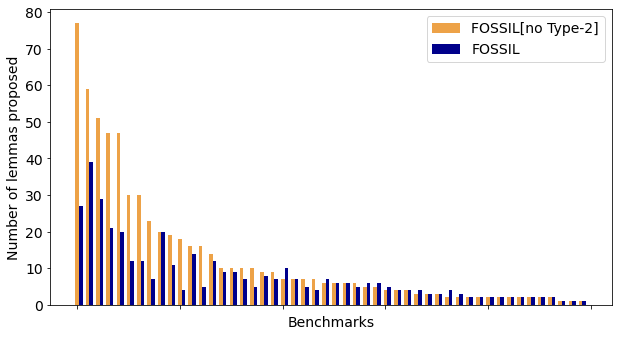

In [10]:
# Plot
x_prop = adjust(nocex_prop, mx=M)
y_prop = adjust(cex_prop, mx=M)
pretty_bar(x_prop, y_prop)

<Figure size 432x288 with 0 Axes>

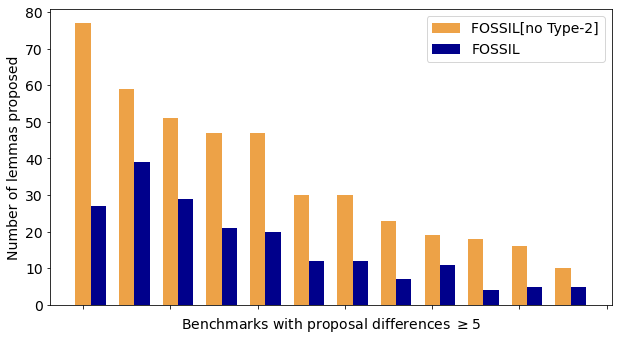

In [11]:
filt = (abs(x_prop - y_prop) >= 5)
pretty_bar(x_prop[filt], y_prop[filt], x_title=r'Benchmarks with proposal differences $\geq 5$',
           savename='bar_FOSSIL_lemmas-proposed-geq5.png')

<Figure size 432x288 with 0 Axes>

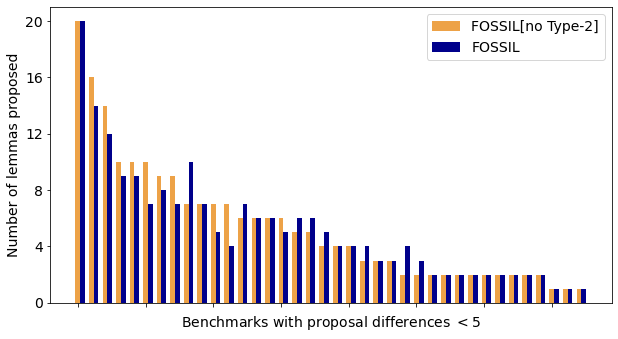

In [12]:
pretty_bar(x_prop[~filt], y_prop[~filt], x_title=r'Benchmarks with proposal differences $<5$',
           y_leg=[0,4,8,12,16,20], savename='bar_FOSSIL_lemmas-proposed-le5.png')

<Figure size 432x288 with 0 Axes>

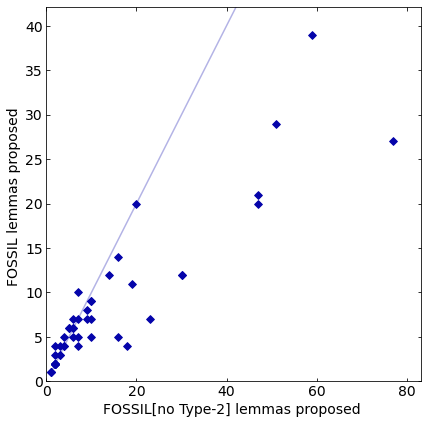

In [13]:
pretty_plot(x_prop, y_prop, x_name='FOSSIL[no Type-2]', tm_val=M+1, mark='D', y_leg='upper left',
            log=False, square=False, measurement='lemmas proposed', unit=None, bands=False,
            save=False, color='xkcd:royal blue')

# E. Cumulative sum (runtimes)

In [14]:
import matplotlib.ticker as mtick

times = process_autobench('autobench_times.txt')
total = len(times)
timeout = 600

<Figure size 432x288 with 0 Axes>

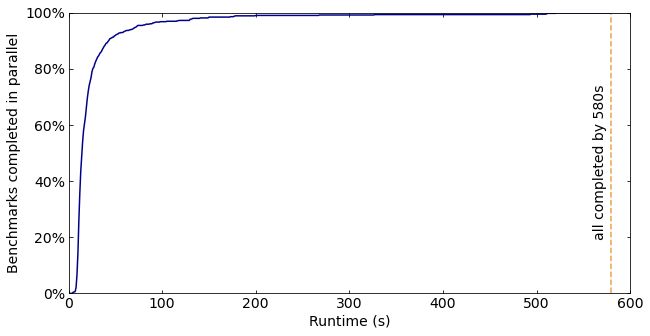

In [15]:
fig = plt.figure()
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
rect_scatter = [left, bottom, width, height]

plt.figure(figsize=(12, 6))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)

times_cs = np.array([len(np.where(times < t)[0]) for t in range(timeout+1)]) / total
data = np.vstack([np.array(range(0,timeout+1)), times_cs])
ax_scatter.plot(100*times_cs, c='darkblue')
plt.axvline(x=min(np.where(times_cs > 1-1/total)[0]), c='#eda247', linestyle='--')
plt.text(560, 20,'all completed by 580s', rotation=90)

ax_scatter.set_xlim(0, timeout)
ax_scatter.set_ylim(0, 100)
ax_scatter.yaxis.set_major_formatter(mtick.PercentFormatter())

ax_scatter.set_xlabel('Runtime (s)')
ax_scatter.set_ylabel('Benchmarks completed in parallel')
fig.tight_layout()

plt.savefig('./plots/csum_FOSSIL_runtimes.png',
            bbox_inches='tight', pad_inches=0.2, dpi=100)